In [2]:
import requests
import json
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from holoviews.operation.datashader import rasterize

In [3]:
# Get data
test_df = pd.read_csv("zipcode2020/20zpallnoagi.csv")
test_df.head()

# Replace all "0" and "99999" Zipcodes with NaN values - 0 is the cumulative measure for the whole state, 99999 is some placeholder used for shipping companies.
test_df.replace({'ZIPCODE': {0: None, 99999: None}}, inplace=True)
# Note: 50 states + ZIPs for DC
test_df.dropna(inplace=True)
#N2 is total taxable individuals, A02650 is total income for that zip code (in thousands of $$)
test_df["Total Income per Individual"] = test_df["A02650"]/test_df["N2"]
slice_df = test_df.loc[:, ["STATE", "ZIPCODE", "N2", "A02650", "Total Income per Individual"]]
slice_df

,STATE,ZIPCODE,N2,A02650,Total Income per Individual
1,AL,35004,10400.0,331183.0000,31.844519
2,AL,35005,6210.0,139266.0001,22.426087
3,AL,35006,2500.0,66755.0001,26.702000
4,AL,35007,25270.0,776780.0000,30.739216
5,AL,35010,15690.0,467529.0000,29.797897
...,...,...,...,...,...
27738,WY,83122,400.0,9420.0002,23.550000
27739,WY,83126,490.0,15103.0002,30.822449
27740,WY,83127,3800.0,168356.0000,44.304211
27741,WY,83128,1950.0,244465.0000,125.366667


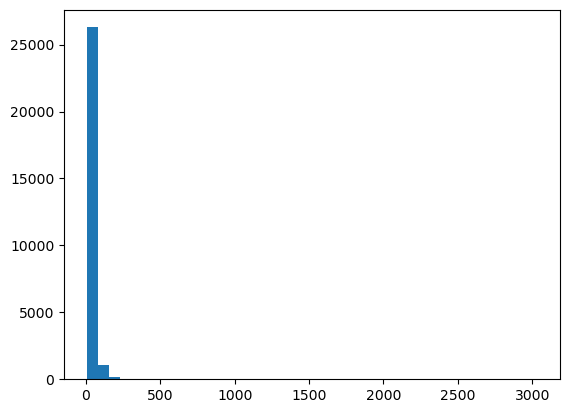

In [4]:
plt.hist(slice_df["Total Income per Individual"], bins=40)
plt.show()
# If you're wondering why the chart is so wide, it's because wealth disparity is a bitch and the Income/Capita in Miami Beach is $3 million.

In [5]:
slice_df.sort_values("Total Income per Individual", ascending=False)
# The numbers match. There are only about 550ish people living in ZIP 33109. Must be an expensive place to be living in...

,STATE,ZIPCODE,N2,A02650,Total Income per Individual
4054,FL,33109,520.0,1.578682e+06,3035.926924
2269,CA,94104,1510.0,2.990505e+06,1980.466887
4192,FL,33480,9050.0,1.466156e+07,1620.061768
2246,CA,94027,5820.0,6.971688e+06,1197.884536
2294,CA,94301,14750.0,1.527798e+07,1035.795390
...,...,...,...,...,...
14224,MT,59444,270.0,2.321000e+03,8.596297
22562,TN,37140,390.0,3.239000e+03,8.305128
22482,SD,57794,390.0,3.206000e+03,8.220513
13627,MO,64147,280.0,1.591000e+03,5.682143


In [6]:
zip_df = pd.read_csv("simplemaps_uszips_basicv1.82/uszips.csv")
zip_df.rename(columns={"zip":"ZIPCODE"}, inplace=True)
zip_df.head()

,ZIPCODE,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,17126.0,102.6,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37895.0,482.5,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49136.0,552.4,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5751.0,50.1,72093,Maricao,"{""72093"": 82.26, ""72153"": 11.68, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26153.0,272.1,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [28]:
new_df = slice_df.merge(zip_df.loc[:, ["ZIPCODE", "lng", "lat"]], how="left", on="ZIPCODE")
new_df

try_df = new_df.copy()
try_df.sort_values("Total Income per Individual", inplace=True)
try_df.reset_index(inplace=True)
try_df

try_df.to_csv("shorterdf.csv")

In [25]:
try_df = new_df.sample(15000)
try_df.sort_values("Total Income per Individual", inplace=True)
try_df.reset_index(inplace=True)
try_df



,index,STATE,ZIPCODE,N2,A02650,Total Income per Individual,lng,lat
0,12873,MS,38738,140.0,5.770000e+02,4.121429,-90.53653,33.93049
1,22399,SD,57794,390.0,3.206000e+03,8.220513,-102.40695,43.12071
2,22477,TN,37140,390.0,3.239000e+03,8.305128,-87.65245,35.86345
3,22358,SD,57658,240.0,2.435000e+03,10.145833,-100.55835,45.65744
4,16609,NY,12733,1090.0,1.122700e+04,10.300000,-74.61020,41.73378
...,...,...,...,...,...,...,...,...
14995,2023,CA,93108,8080.0,4.345627e+06,537.825124,-119.60397,34.44934
14996,2287,CA,94304,3250.0,1.970445e+06,606.290769,-122.16699,37.39744
14997,5749,IL,60604,730.0,4.688640e+05,642.279452,-87.62928,41.87799
14998,14855,NV,89413,360.0,2.594190e+05,720.608334,-119.92095,39.07389


In [26]:
# I think non-datashaded things fail at around 11-12k points
money_plot = try_df.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "CartoLight",
    frame_width = 800,
    frame_height = 600,
    scale = .7,
    color = "Total Income per Individual",
    cmap = "hot_r",
    colorbar = True,
    xlabel="Longitude",
    ylabel="Latitude",
    title= "ZIPs by MONEY"
)
money_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (Total Income per Individual)

In [15]:
# I think non-datashaded things fail at around 11-12k points
money_plot = try_df.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "CartoLight",
    frame_width = 800,
    frame_height = 600,
    scale = .7,
    color = "Total Income per Individual",
    cmap = "hot_r",
    datashade=True,
    colorbar = True,
    xlabel="Longitude",
    ylabel="Latitude",
    title= "ZIPs by MONEY"
)
money_plot

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [lng,lat]   (R,G,B,A)